# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import pandas as pd

import os as os

import re as re

varnames=["type","food","form","price_per_lb","yield","lb_per_cup","price_per_cup"]

In [3]:
def getFoodRows(q,food_type):
    """
    getFoodRows, a function that gets the qth file in the fruits/vegetables directory and returns clean data from the xlsx file.
    I use regular expressions to select rows that contain today, my criterion is finding when the yield column contains numbers.
    Args:
    q=The index for the directory
    food_type=The food type to select for directory searching. "fruit" yields the fruits directory, "vegetables" yields vegetables.
    Returns:
    final_food_rows: A n by 8 data frame, with n being the number of entries in the xlsx file.
    """
    #Select the proper directory
    food_dir="C:/Users/Patrick Vacek/Desktop/WQ17/STA 141B/"+food_type.upper()
    os.chdir(food_dir)
    
    #Read in the data and use the regular expression criterion, also reset the row indices for future concatenation
    raw_data=pd.read_excel(os.listdir()[q])
    entries_check=raw_data.iloc[:,4].apply(str).str.match("\d+")==True
    fresh_data=raw_data[entries_check].iloc[:,[0,1,3,4,6]]
    fresh_data.index=range(len(fresh_data.index))
    
    #Use the entries check to generate an indicator variable that returns True if the data is structured like "tomatoes.xlsx"
    #Since the "header" of the spreadsheet is right above the first row that contains data, we'll use argmax() to find the header
    #Also, we have to make sure we don't use re.search() on any NA values
    header_index=entries_check.argmax()-1
    data_header=raw_data.iloc[header_index,0]
    data_is_Fresh=False
    if(isinstance(data_header,str)==True):
        data_is_Fresh=bool(re.search("Fresh",data_header))
    
    #Get the food/type data ready
    food_name=os.listdir()[q]
    food_name=re.sub("\.xlsx$","",food_name)
    food_info=pd.DataFrame({"type":[food_type]*len(fresh_data.index),"AllFresh":[data_is_Fresh]*len(fresh_data.index),
                            "food":[food_name]*len(fresh_data.index)})
    
    #Fix the variable names, create final dataframe
    fresh_data.columns=[v for v in varnames[2:]]
    final_food_rows=pd.concat([food_info,fresh_data],axis=1,join="inner")
    return(final_food_rows)

__Data Strategy:__ While reading through the excel files, I found that it is definitely possible to get all the data from the dataset. However, I had to use an alternative strategy to do this. Instead of searching for rows that contained "Fresh", I searched one of the numeric columns and used regular expressions to find when it contained numbers. By doing this, we can yield all of the data from the excel files.

However, we cannot get all the "fresh" food just by searching for "fresh" in the type column. We need to consider alternative cases, such as tomatoes.xlsx, where all of the entries are fresh, but there's a header that indicates "fresh" at the top. In order to get this data, I used the argmax() function to find the first row of data, and then jumped up to the header above the data. If the header contained the word fresh, I stored it in a boolean variable called "AllFresh". By doing this, we can subset the data by two conditions, and get all fresh foods from the excel files.

In [5]:
#Exercise 1.1: get fruit data

fruit_dir="C:/Users/Patrick Vacek/Desktop/WQ17/STA 141B/FRUIT"
full_fruit=pd.concat([getFoodRows(i,"fruit") for i in range(len(os.listdir(fruit_dir)))]).reset_index(drop=True)
fresh_fruit=full_fruit[full_fruit.iloc[:,3].str.match("Fresh")==True]
fresh_fruit.head()

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,False,apples,fruit,Fresh1,1.56752,0.9,0.242508,0.422373
4,False,apricots,fruit,Fresh1,3.04007,0.93,0.363763,1.1891
8,False,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
10,False,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
12,False,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318


We can generate the subset of fresh fruit data simply by finding when the form contains the word "fresh". We do not need to consider any other special subsetting cases because the allFresh variable is always false in full_fruit.

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [6]:
#Exercise 1.2: get vegetable data

veg_dir="C:/Users/Patrick Vacek/Desktop/WQ17/STA 141B/VEGETABLES"
full_veg=pd.concat([getFoodRows(i,"vegetables") for i in range(len(os.listdir(veg_dir)))]).reset_index(drop=True)
fresh_veg=full_veg[(full_veg.AllFresh.isin([True])&(full_veg.iloc[:,3].str.contains("1")==True)) | full_veg.iloc[:,3].str.match("Fresh")==True]
fresh_veg.head()

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,False,acorn_squash,vegetables,Fresh1,1.17225,0.458554,0.451948,1.15536
1,False,artichoke,vegetables,Fresh1,2.21305,0.375309,0.385809,2.27497
4,False,asparagus,vegetables,Fresh1,3.21349,0.493835,0.396832,2.58227
7,False,avocados,vegetables,Fresh1,2.23587,0.740753,0.31967,0.964886
13,True,broccoli,vegetables,Florets1,2.56847,1,0.341717,0.877689


My code does produce the correct price for tomatoes, as we can see below. However, there are multiple categories of tomatoes, so we may need to check the group price. I had to do a bit of complex subsetting for the vegetables, I subsetted by whether allFresh is True AND if the form variable contained a 1 (all fresh entries contain a 1 due to a footnote) or if the form itself contained the word "Fresh". The issue is that there are some fresh vegetables under the "AllFresh" variable, but not all vegetables in each respective file are fresh. We can see this by looking at the tomato data:

In [126]:
full_veg[full_veg.food=="tomatoes"]

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
89,True,tomatoes,vegetables,"Grape and cherry1,2",3.28896,0.91,0.374786,1.35457
90,True,tomatoes,vegetables,"Roma1,3",1.24342,0.91,0.374786,0.512105
91,True,tomatoes,vegetables,"Beefsteak1,4",3.15921,0.91,0.374786,1.30113
92,True,tomatoes,vegetables,Canned5,0.924836,1,0.540133,0.499534


This problem persisted for a handful of other files, the problem occurs because it lists "Fresh" as a header instead of under the form variable. This occurs with other files too, and we can see that it occurs 8 times by using some Pandas techniques.

In [133]:
len(fresh_veg[fresh_veg.AllFresh==True].food.unique())

8

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [7]:
food_df=pd.concat([fresh_fruit,fresh_veg]).reset_index(drop=True)
food_df

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,False,apples,fruit,Fresh1,1.56752,0.9,0.242508,0.422373
1,False,apricots,fruit,Fresh1,3.04007,0.93,0.363763,1.1891
2,False,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
3,False,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
4,False,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318
5,False,cantaloupe,fruit,Fresh1,0.535874,0.51,0.374786,0.3938
6,False,cherries,fruit,Fresh1,3.59299,0.92,0.341717,1.33455
7,False,grapefruit,fruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,False,grapes,fruit,Fresh1,2.09383,0.96,0.330693,0.721266
9,False,honeydew,fruit,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive? (Part A)
* How do the price distributions compare for fruit and vegetables? (Part B)
* Which foods are the best value for the price? (Part C)
* What's something surprising about this data set? (Part D)
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis. (Part E)

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)

__Answer to part A,"What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?":__

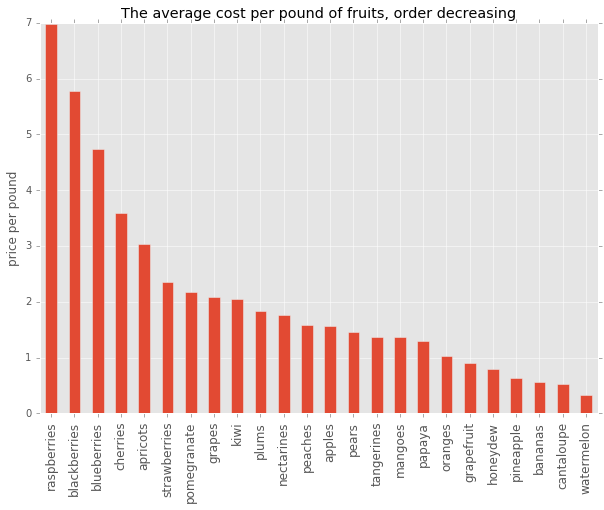

In [9]:
#Make a per pound plot
fruit_lb_sort=fresh_fruit.sort_values(by="price_per_lb",ascending=False)
fruit_lb_sort.price_per_lb.plot(kind="bar")
plt.xticks(list(range(len(fruit_lb_sort))), fruit_lb_sort.iloc[:,1], rotation=90, fontsize = 12)
plt.ylabel("price per pound")
plt.title("The average cost per pound of fruits, order decreasing")
plt.show()

In order to answer this question, I used a barplot to show the price per pound of each fruit. Doing so yields that the priciest fruits are raspberries, blackberries, and blueberries. The cheapest fruits are bananas, cantaloupe, watermelon. This makes a lot of sense because watermelons are very large and berries are very small.

__Answer to part B,"How do the price distributions compare for fruit and vegetables?":__

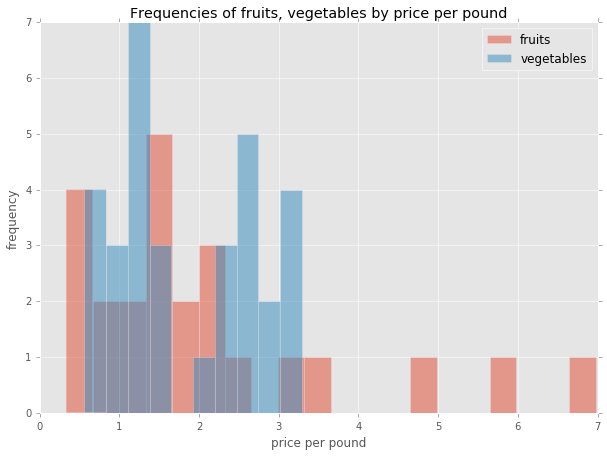

In [10]:
fresh_fruit.price_per_lb.hist(bins=20,alpha=0.5,label="fruits")
fresh_veg.price_per_lb.hist(bins=10,alpha=0.5,label="vegetables")
plt.xlabel("price per pound")
plt.ylabel("frequency")
plt.title("Frequencies of fruits, vegetables by price per pound")
plt.legend()
plt.show()

As we can see, the distribution for fruits is skew right, with significant outliers for price per pound. Vegetables has a more consistent distribution. The variances are likely to also be significantly different. While the means may differ for these distributions due to outliers, the medians are likely to be similar due to the distributions having peaks that are very close to each other.

__Answer to part C, "Which foods are the best value for the price?":__

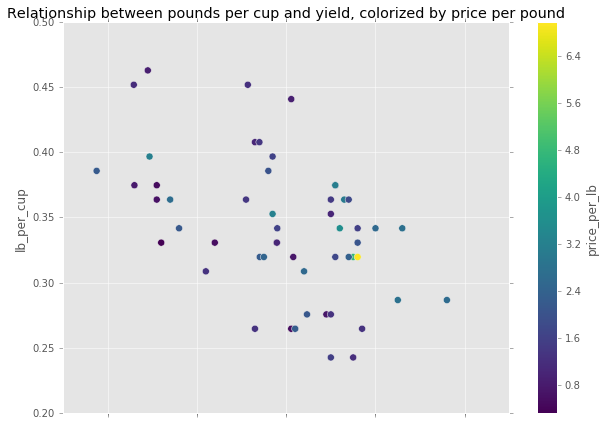

In [148]:
food_df.plot.scatter(x="yield",y="lb_per_cup",c="price_per_lb",s=50,cmap="viridis")
plt.xlabel("yield")
plt.title("Relationship between pounds per cup and yield, colorized by price per pound")
plt.show()

I decided to use three variables to quantify the value-for-price relationship: yield, pounds per cup, and price per pound. I made a scatterplot showing the relationship between pounds per cup and yield, and then I colorized the points by their price. As we can see, the two size variables have a significant negative correlation. It appears that the products in the upper left of the data tend to have lower prices. We can see this data below:

In [149]:
food_df[food_df.lb_per_cup>0.4]

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
7,False,grapefruit,fruit,Fresh1,0.897802,0.49,0.462971,0.848278
13,False,oranges,fruit,Fresh1,1.03517,0.73,0.407855,0.578357
22,False,tangerines,fruit,Fresh1,1.37796,0.74,0.407855,0.759471
24,False,acorn_squash,vegetables,Fresh1,1.17225,0.458554,0.451948,1.15536
31,False,butternut_squash,vegetables,Fresh1,1.24474,0.714,0.451948,0.787893
51,False,sweet_potatoes,vegetables,Fresh1,0.918897,0.811301,0.440925,0.4994


We can see that sweet potatoes has a very high yield compared to others, and also a very low price. Therefore it can be considered as one of the best "value-for-price" deals in terms of products. We can justify this by considering that although it is not the cheapest, it has a very large yield for being fairly cheap. Nonetheless, the other products listed are also great "value-for-price" products.

__Answer to part D,"What's something surprising about this data set?":__

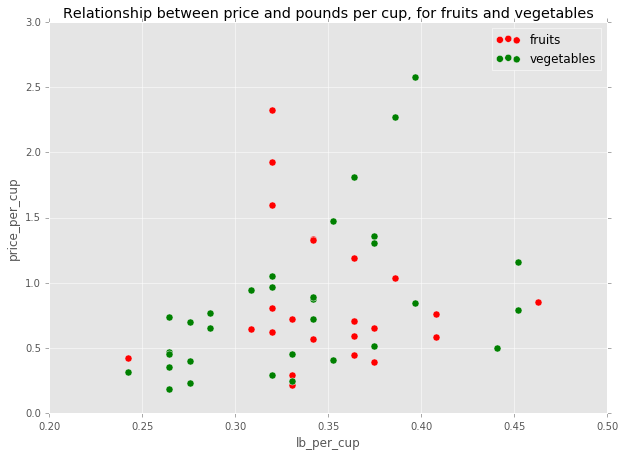

In [150]:
fruit_ax=fresh_fruit.plot.scatter(x="lb_per_cup",y="price_per_cup",s=50,color="red",label="fruits")
fresh_veg.plot.scatter(x="lb_per_cup",y="price_per_cup",s=50,color="green",label="vegetables",ax=fruit_ax)
plt.title("Relationship between price and pounds per cup, for fruits and vegetables")
plt.show()

What I found surprising about this dataset, is the non-linear relationship between price per cup and pounds per cup. This shows that there is a confounding variable between these two, and it may come down to consumer demand for the product. It appears as if there is heteroscedacity in the middle values of pounds per cup. Below are some of the products that are potentially causing the heteroscedacity:

In [151]:
food_df[(food_df.lb_per_cup>0.3)&(food_df.price_per_cup>1.5)]

,AllFresh,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
3,False,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
4,False,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318
20,False,raspberries,fruit,Fresh1,6.97581,0.96,0.31967,2.32287
25,False,artichoke,vegetables,Fresh1,2.21305,0.375309,0.385809,2.27497
26,False,asparagus,vegetables,Fresh1,3.21349,0.493835,0.396832,2.58227
37,False,corn_sweet,vegetables,Fresh1,2.69062,0.54,0.363763,1.8125


__Answer to part E,"Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.":__

Since I can already measure price and yield, I reached the conclusion that the sweet potato has the best combination of these two variables. Since sweet potatoes already seem very nutritious, I am expecting that they will yield the best combination of price, yield AND nutrition. We could test this hypothesis with some multivariate analysis. By generating a data matrix with proper measures of price, yield and nutrition, we could try to find the largest Mahalanobis Distance outlier in a given direction.